In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import datashader as ds
import datashader.transfer_functions as tf
from colorcet import fire

In [3]:
def generate_logistic(N, mu):
    transients = 500
    x = np.zeros((N+transients, 1))
    x[0] = [np.random.uniform(low=0, high=0.5)]
    for i in range(1, N+transients):
        x[i] = mu * x[i-1] * (1-x[i-1])
    return x[transients:]

def bifurcation_diagram(generator_func, control_param_min, control_param_max, control_param_step, N, **kwargs):
    control_param_values = np.arange(control_param_min, control_param_max, control_param_step)
    control_params = []
    x_values = []

    for control_param in control_param_values:
        x = generator_func(N, control_param, **kwargs)
        control_params.append(np.full(x.shape, control_param).squeeze())
        x_values.append(x.squeeze())

    return np.concatenate(control_params), np.concatenate(x_values)


In [44]:
control_params_log, x_values_log = bifurcation_diagram(generate_logistic, 2.5, 4.0, 0.0001, 400)


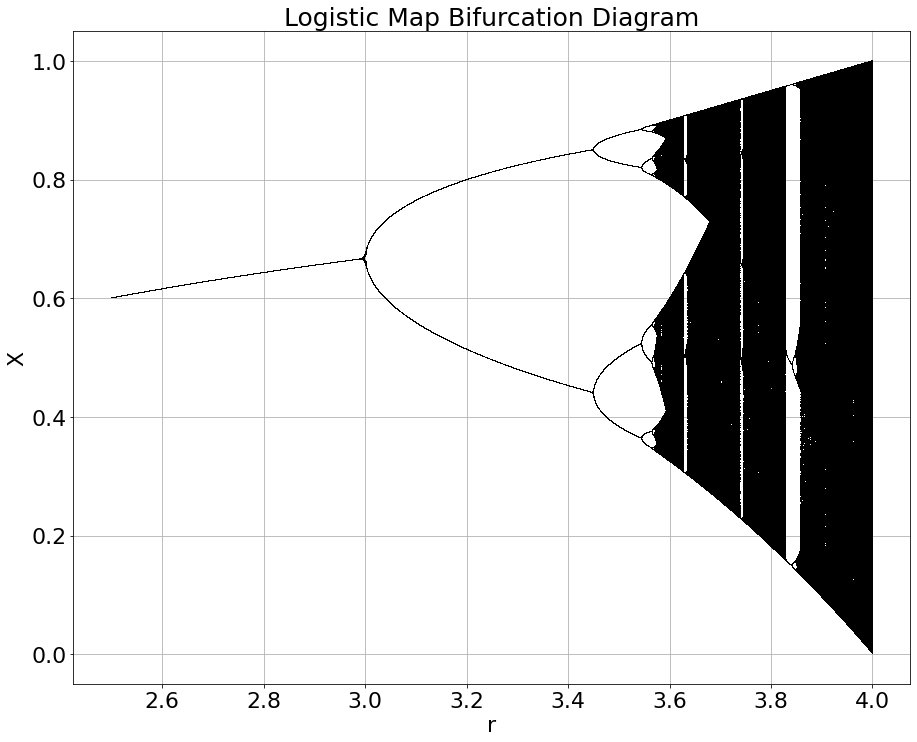

In [46]:
plt.figure(figsize=(15, 12))
plt.plot(control_params_log, x_values_log, ',k', alpha=1)
plt.grid()
plt.xlabel('r', fontsize=22)
plt.ylabel('X', fontsize=22)
plt.xticks(fontsize=22)
plt.yticks(fontsize=22)
plt.title('Logistic Map Bifurcation Diagram', fontsize=25)
plt.savefig('logistic_bifurcation.png', dpi=400, transparent=True)
plt.show()

In [19]:
def generate_henon(N, mu):
    transients = 100
    b = 0.3
    x = np.zeros((N + transients, 2))
    x[0] = [np.random.uniform(low=0.001, high=0.01), np.random.uniform(low=0.001, high=0.01)]
    for i in range(1, N+transients):
        x[i, 0] = 1 - mu * x[i-1, 0]**2 + x[i-1, 1]
        x[i, 1] = b * x[i-1, 0] 

    return x[transients:, 0]

In [42]:
control_params_henon, x_values_henon = bifurcation_diagram(generate_henon, 0.1, 1.4, 0.0001, 500)

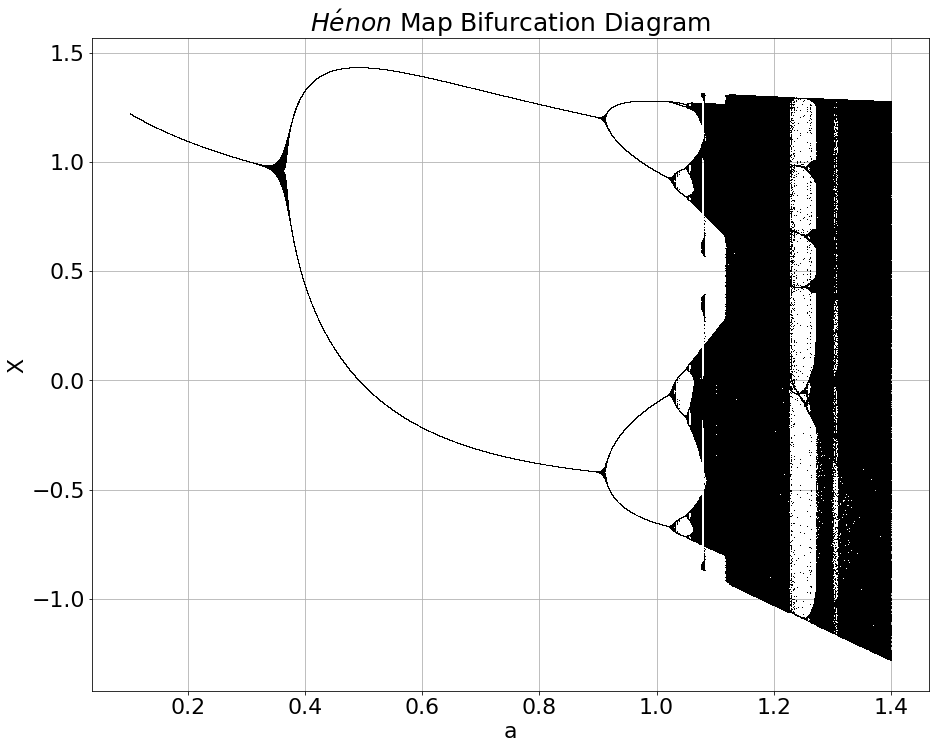

In [64]:
plt.figure(figsize=(15, 12))
plt.plot(control_params_henon, x_values_henon, ',k', alpha=1)
plt.grid()
plt.xlabel('a', fontsize=22)
plt.ylabel('X', fontsize=22)
plt.xticks(fontsize=22)
plt.yticks(fontsize=22)
plt.title(r'$H\acute{e}non$ Map Bifurcation Diagram', fontsize=25)
plt.savefig('henon_bifurcation.png', dpi=400, transparent=True)
#plt.show()

In [31]:
def generate_burgers(N, mu):
    transients = 500
    a = 0.75
    x = np.zeros((N + transients, 2))
    x[0] = [np.random.uniform(low=0.001, high=0.01), np.random.uniform(low=0.001, high=0.01)]
    for i in range(1, N+transients):
        x[i, 0] = a * x[i-1, 0] - x[i-1,1]**2 
        x[i, 1] = mu * x[i-1, 1] + x[i-1, 0] * x[i-1, 1]
    return x[transients:, 0]

In [32]:
control_params_burgers, x_values_burgers = bifurcation_diagram(generate_burgers, 0.9, 1.8, 0.00005, 500)

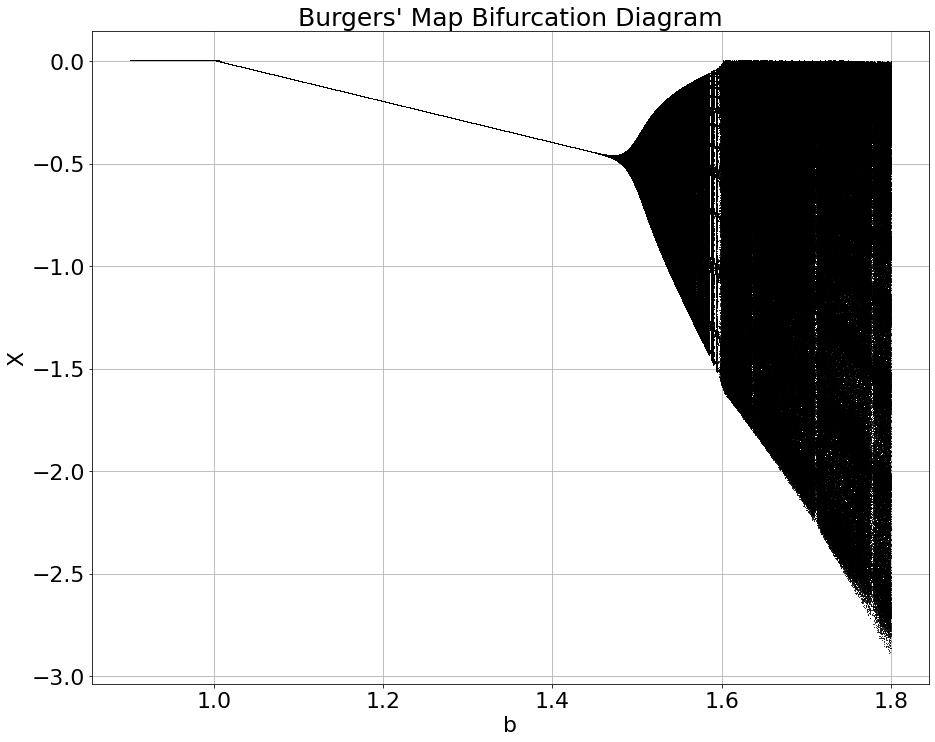

In [58]:
plt.figure(figsize=(15, 12))
plt.grid()
plt.plot(control_params_burgers, x_values_burgers, ',k', alpha=0.8)
plt.xlabel('b', fontsize=22)
plt.ylabel('X', fontsize=22)
plt.xticks(fontsize=22)
plt.yticks(fontsize=22)
plt.title("Burgers' Map Bifurcation Diagram", fontsize=25)
plt.savefig('burgers_bifurcation.png', transparent=True, dpi=400)
#plt.show()

In [97]:
df = pd.DataFrame({'Control Parameter': control_params, 'X': x_values})

In [112]:
canvas = ds.Canvas(plot_width=2000, plot_height=1500)
agg = canvas.points(df, 'Control Parameter', 'X')
img = tf.shade(agg, cmap=fire)
img = tf.set_background(img, 'white')

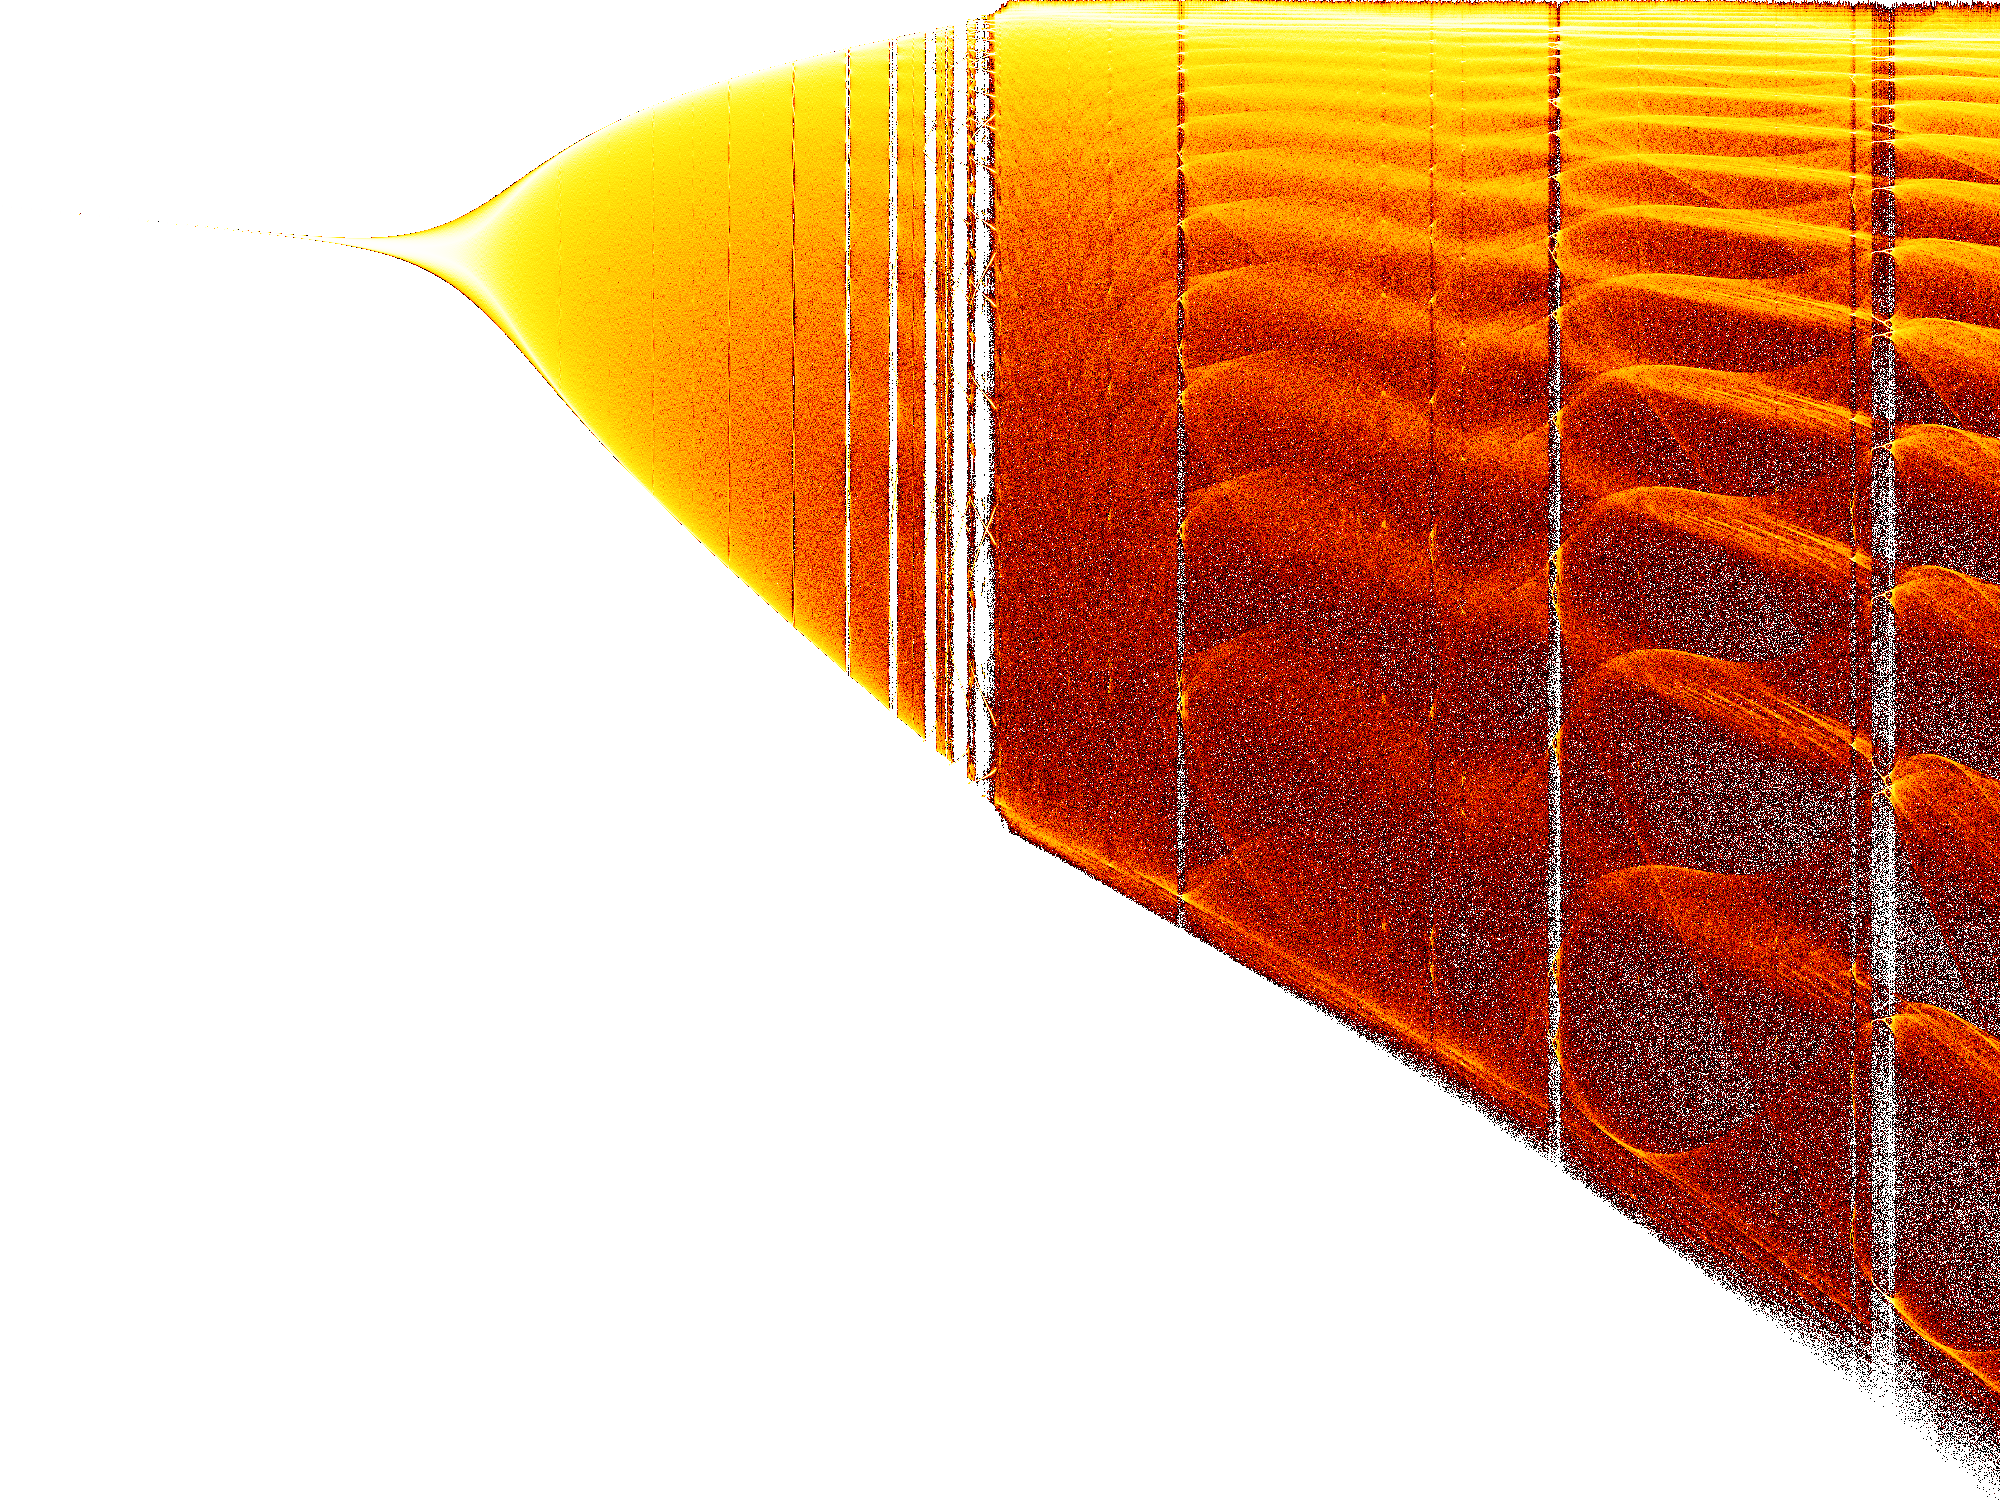

In [113]:
img

In [47]:
def generate_cubic(N, mu):
    transients = 500
    x = np.zeros((N + transients, 2))
    x[0] = [np.random.uniform(low=0.001, high=0.01), mu]
    for i in range(1, N+transients):
        x[i, 0] =  mu * x[i-1, 0] * (1-x[i-1, 0]**2)
        x[i, 1] =  mu
    return x[transients:, 0] 

In [48]:
control_params_cubic, x_values_cubic = bifurcation_diagram(generate_cubic, 1.8, 3, 0.0001, 500)

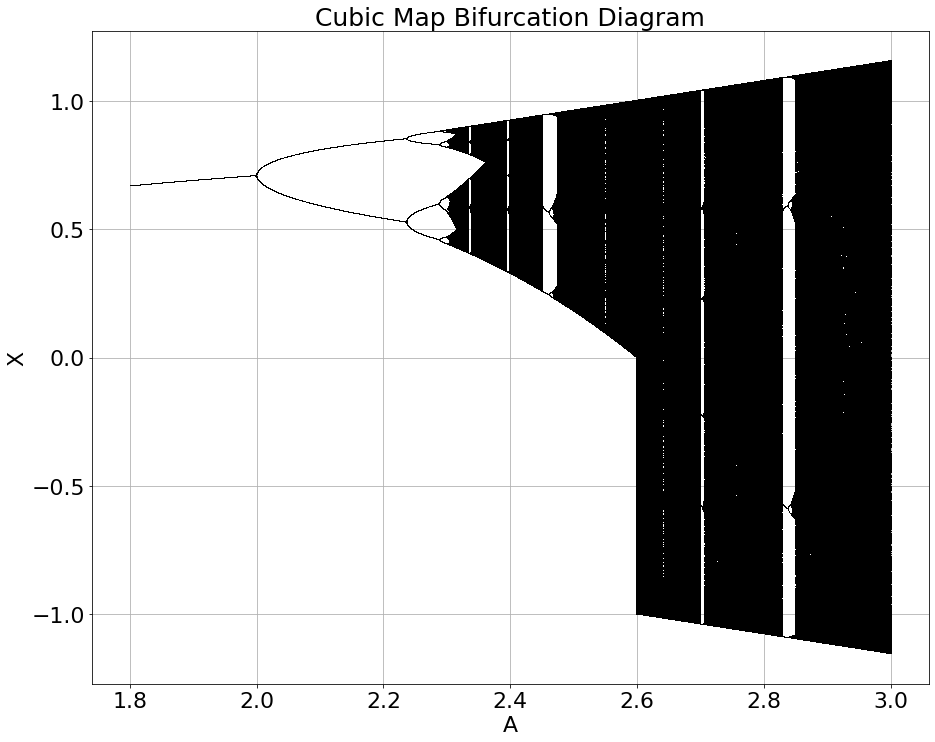

In [53]:
plt.figure(figsize=(15, 12))
plt.plot(control_params_cubic, x_values_cubic, ',k', alpha=1)
plt.grid()
plt.xlabel('A', fontsize=22)
plt.ylabel('X', fontsize=22)
plt.xticks(fontsize=22)
plt.yticks(fontsize=22)
plt.title('Cubic Map Bifurcation Diagram', fontsize=25)
#plt.show()
plt.savefig('cubic_bifurcation.png', transparent=True, dpi=400)

In [54]:
def generate_tinkerbell(N, mu):
    transients = 500
    a = 0.9
    b = -0.6013
    d = 0.5
    x = np.zeros((N + transients, 2))
    x[0] = [np.random.uniform(low=0.001, high=0.01), np.random.uniform(low=0.001, high=0.01)]
    for i in range(1, N+transients):
        x[i, 0] =  x[i-1, 0]**2 - x[i-1, 1]**2 + a * x[i-1, 0] + b * x[i-1, 1]
        x[i, 1] =  2 * x[i-1, 0] * x[i-1, 1] + mu * x[i-1, 0] + d * x[i-1, 1]
    return x[transients:] 

In [55]:
control_params_tinkerbell, x_values_tinkerbell = bifurcation_diagram(generate_tinkerbell, 0.1, 1.8, 0.0001, 500)

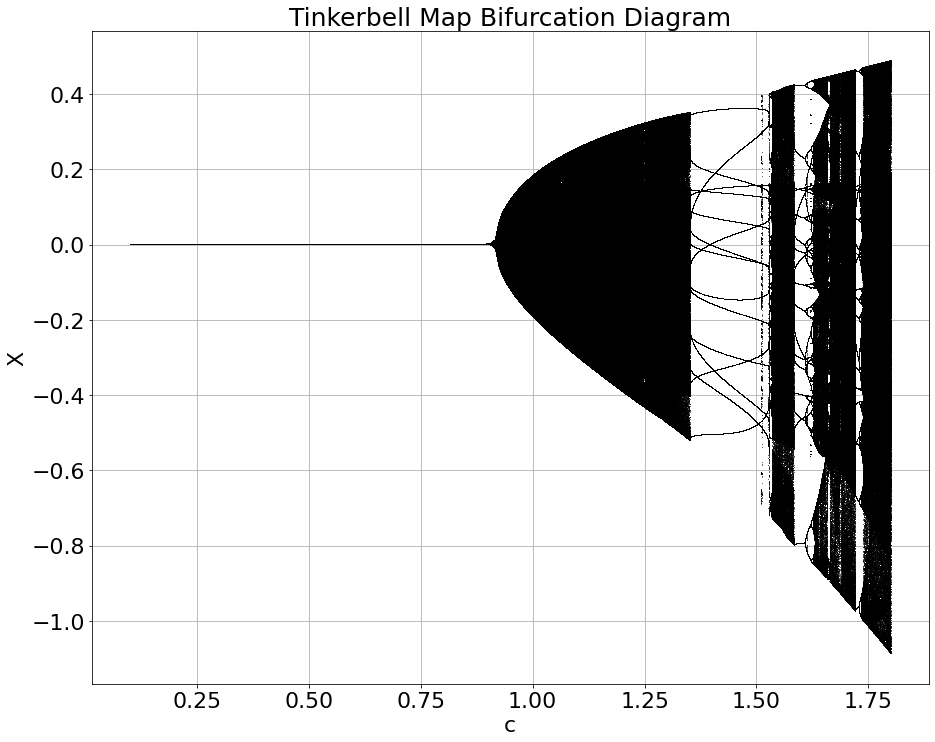

In [59]:
plt.figure(figsize=(15, 12))
plt.plot(control_params_tinkerbell, x_values_tinkerbell, ',k', alpha=0.6)
plt.grid()
plt.xlabel('c', fontsize=22)
plt.ylabel('X', fontsize=22)
plt.xticks(fontsize=22)
plt.yticks(fontsize=22)
plt.title('Tinkerbell Map Bifurcation Diagram', fontsize=25)
#plt.show()
plt.savefig('tinkerbell_bifurcation.png', transparent=True, dpi=400)